# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

# ¡Hola!  

Mi nombre es Maria Efimova, soy code reviewer de Practicum y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

## Inicialización

In [246]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt


### Cargar datos

In [247]:
# Carga el archivo de datos en un DataFrame
dataset = pd.read_csv('/datasets/vehicles_us.csv')


### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina


In [348]:
# imprime la información general/resumida sobre el DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43009 entries, 0 to 43008
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   level_0           43009 non-null  int64         
 1   index             43009 non-null  int64         
 2   price             43009 non-null  int64         
 3   model_year        43009 non-null  datetime64[ns]
 4   model             43009 non-null  object        
 5   condition         43009 non-null  int64         
 6   cylinders         43009 non-null  int64         
 7   fuel              43009 non-null  object        
 8   odometer          43009 non-null  float64       
 9   transmission      43009 non-null  object        
 10  type              43009 non-null  object        
 11  paint_color       43009 non-null  object        
 12  is_4wd            43009 non-null  int64         
 13  date_posted       43009 non-null  datetime64[ns]
 14  days_listed       4300

In [249]:
# imprimir una muestra de datos
dataset.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


<div class="alert alert-block alert-success">
Comentarios generales 1
    
<b>Comentario del revisor</b> <a class="tocSkip"></a> Si no necesitas todas columnas entonces puedes eliminar unas

In [250]:
print('Total de modelos contenidos en la lista:', len(dataset['model'].unique()))
print(dataset['model'].value_counts())

Total de modelos contenidos en la lista: 100
ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
kia sorento                           236
acura tl                              236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64


- Se requiere investigación para determinar el patrón de los datos ausentes por modelo a lo largo del dataframe y la corrección de algunos de ellos donde sea posible.


- Las columna cylinders contienen datos flotantes en lugar de enteros.
- La columna date_posted contiene objetos en lugar de formato datetime.
- La columna model_year contiene flotantes en lugar de datetime.


- Existen 5 columnas con datos ausentes: model_year, cylinders, odometer, paint_color, is_4wd.
- Aparentemente is_4wd contiene la mayor cantidad de datos ausentes.

### Conclusiones y siguientes pasos

- A mi parecer los datos ausentes en model_year, odometer y cylinders son relevantes para determinar el precio de un vehículo. Considero necesario analizar el patrón de los datos ausentes en estas columnas y verificar si pueden ser eliminados o rellenados con datos medios, medianos o valores binarios.


## Tratar los valores ausentes (si hay)

In [251]:
print('Total de ausentes en model_year:',dataset['model_year'].isna().sum())
print('Porcentaje de datos ausentes en model_year:',dataset['model_year'].isna().sum()/dataset['model_year'].count())

Total de ausentes en model_year: 3619
Porcentaje de datos ausentes en model_year: 0.07554377322256085


In [252]:
print('Total de modelos con datos faltantes:', len(dataset[dataset['model_year'].isna()]['model'].unique()))
print()
print('Listado de modelos con datos faltantes:','\n','\n',sorted(dataset[dataset['model_year'].isna()]['model'].unique()))

Total de modelos con datos faltantes: 100

Listado de modelos con datos faltantes: 
 
 ['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade', 'chevrolet camaro', 'chevrolet camaro lt coupe 2d', 'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze', 'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu', 'chevrolet silverado', 'chevrolet silverado 1500', 'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd', 'chevrolet silverado 3500hd', 'chevrolet suburban', 'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse', 'chrysler 200', 'chrysler 300', 'chrysler town & country', 'dodge charger', 'dodge dakota', 'dodge grand caravan', 'ford econoline', 'ford edge', 'ford escape', 'ford expedition', 'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd', 'ford f-250 super duty', 'ford f-350 sd', 'ford f150', 'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty', 'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus se', 'ford fusio

<div class="alert alert-block alert-success">
Comentarios generales 1
    
<b>Comentario del revisor</b> <a class="tocSkip"></a> Bien pero seria mejor si lo muestres en DataFrame

In [253]:
Missing_model_year_by_model = dataset[dataset['model_year'].isna()]['model'].value_counts()
print('TOP 20 de datos ausentes en model_year')
print()
print(Missing_model_year_by_model.head(20))
print('TOTAL =======================', Missing_model_year_by_model.head(20).sum())

TOP 20 de datos ausentes en model_year

ford f-150                    191
chevrolet silverado 1500      155
ram 1500                      117
chevrolet silverado            98
honda accord                   80
ram 2500                       80
jeep wrangler                  70
ford escape                    68
jeep grand cherokee            68
honda civic                    60
toyota tacoma                  58
chevrolet silverado 2500hd     54
toyota camry                   54
chevrolet tahoe                54
gmc sierra 1500                54
ford explorer                  53
honda cr-v                     53
toyota corolla                 51
nissan altima                  51
dodge grand caravan            47
Name: model, dtype: int64
TOTAL ======================= 1516


In [254]:
TOP_20_MY = Missing_model_year_by_model[Missing_model_year_by_model>47]

<AxesSubplot:title={'center':'Top models missing model year'}>

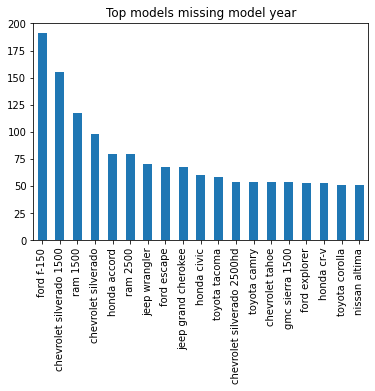

In [255]:
TOP_20_MY.plot(title = 'Top models missing model year', kind='bar')

<div class="alert alert-block alert-success">
Comentarios generales 1
    
<b>Comentario del revisor</b> <a class="tocSkip"></a> Aqui correcto!

In [256]:
print('Total de ausentes en odometer:',dataset['odometer'].isna().sum())
print('Porcentaje de datos ausentes en odometer:',dataset['odometer'].isna().sum()/dataset['odometer'].count())

Total de ausentes en odometer: 7892
Porcentaje de datos ausentes en odometer: 0.18087227557124194


In [257]:
print('Total de modelos con datos faltantes:', len(dataset[dataset['odometer'].isna()]['model'].unique()))
print()
print('Listado de modelos con datos faltantes:','\n','\n',sorted(dataset[dataset['odometer'].isna()]['model'].unique()))

Total de modelos con datos faltantes: 100

Listado de modelos con datos faltantes: 
 
 ['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade', 'chevrolet camaro', 'chevrolet camaro lt coupe 2d', 'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze', 'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu', 'chevrolet silverado', 'chevrolet silverado 1500', 'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd', 'chevrolet silverado 3500hd', 'chevrolet suburban', 'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse', 'chrysler 200', 'chrysler 300', 'chrysler town & country', 'dodge charger', 'dodge dakota', 'dodge grand caravan', 'ford econoline', 'ford edge', 'ford escape', 'ford expedition', 'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd', 'ford f-250 super duty', 'ford f-350 sd', 'ford f150', 'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty', 'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus se', 'ford fusio

In [258]:
Missing_odometer_by_model = dataset[dataset['odometer'].isna()]['model'].value_counts()
print('TOP 20 de datos ausentes en odometer')
print()
print(Missing_odometer_by_model.head(20))
print('TOTAL =======================',Missing_odometer_by_model.head(20).sum())

TOP 20 de datos ausentes en odometer

ford f-150                    419
chevrolet silverado 1500      322
ram 1500                      279
chevrolet silverado           192
ram 2500                      181
jeep wrangler                 177
ford escape                   156
honda accord                  143
chevrolet silverado 2500hd    139
toyota camry                  138
ford explorer                 138
gmc sierra 1500               137
nissan altima                 133
toyota tacoma                 120
honda civic                   119
jeep grand cherokee           116
chevrolet impala              115
ford focus                    107
toyota corolla                106
chevrolet malibu              103
Name: model, dtype: int64
TOTAL ======================= 3340


In [259]:
TOP_20_OD = Missing_odometer_by_model[Missing_odometer_by_model>103]

<AxesSubplot:title={'center':'Top models missing odometer'}>

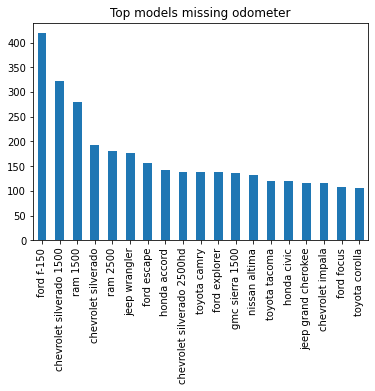

In [260]:
TOP_20_OD.plot(title = 'Top models missing odometer', kind='bar')

In [261]:
print('Total de ausentes en cyliders:',dataset['cylinders'].isna().sum())
print('Porcentaje de datos ausentes en cylinders:',dataset['cylinders'].isna().sum()/dataset['cylinders'].count())

Total de ausentes en cyliders: 5260
Porcentaje de datos ausentes en cylinders: 0.11369285637090673


In [262]:
print('Total de modelos con datos faltantes:', len(dataset[dataset['cylinders'].isna()]['model'].unique()))
print()
print('Listado de modelos con datos faltantes:','\n','\n',sorted(dataset[dataset['cylinders'].isna()]['model'].unique()))

Total de modelos con datos faltantes: 100

Listado de modelos con datos faltantes: 
 
 ['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade', 'chevrolet camaro', 'chevrolet camaro lt coupe 2d', 'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze', 'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu', 'chevrolet silverado', 'chevrolet silverado 1500', 'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd', 'chevrolet silverado 3500hd', 'chevrolet suburban', 'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse', 'chrysler 200', 'chrysler 300', 'chrysler town & country', 'dodge charger', 'dodge dakota', 'dodge grand caravan', 'ford econoline', 'ford edge', 'ford escape', 'ford expedition', 'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd', 'ford f-250 super duty', 'ford f-350 sd', 'ford f150', 'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty', 'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus se', 'ford fusio

In [263]:
Missing_cylinders_by_model = dataset[dataset['cylinders'].isna()]['model'].value_counts()
print('TOP 20 de datos ausentes en cylinders')
print()
print(Missing_cylinders_by_model.head(20))
print('TOTAL =======================', Missing_cylinders_by_model.head(20).sum())

TOP 20 de datos ausentes en cylinders

ford f-150                    316
chevrolet silverado 1500      231
ram 1500                      185
chevrolet silverado           137
ram 2500                      122
jeep wrangler                 112
toyota tacoma                  97
honda civic                    95
ford focus                     93
toyota camry                   92
ford explorer                  91
jeep grand cherokee            88
honda accord                   88
chevrolet silverado 2500hd     86
nissan altima                  84
gmc sierra 1500                84
chevrolet tahoe                77
toyota corolla                 77
ford escape                    75
chevrolet malibu               70
Name: model, dtype: int64
TOTAL ======================= 2300


In [264]:
TOP_20_C = Missing_cylinders_by_model[Missing_cylinders_by_model>70]

<AxesSubplot:title={'center':'Top models missing cylinders'}>

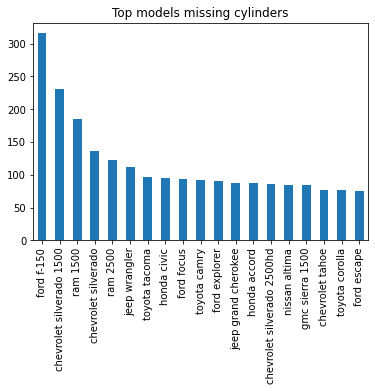

In [265]:
TOP_20_C.plot(title = 'Top models missing cylinders', kind='bar')

**CONCLUSIONES SOBRE LOS VALORES AUSENTES**

- La columna model_year tiene 7.5% de datos ausentes totales.
- La columna odometer tiene 18% de datos ausentes totales.
- La columna cylinders tiene 11% de datos ausentes totales.

- Todos los 100 modelos de la lista tienen datos ausentes en las tres columnas mencionadas arriba.
- Para las tres columnas se repite en el top 5 los siguientes modelos de vehículos:
    - ford f-150                    
    - chevrolet silverado 1500      
    - ram 1500                     
    - chevrolet silverado            
    - ram 2500
- No existe otro patrón evidente que relacione los datos ausentes entre las tres columnas evaluadas.

Dado que model_year, odometer y cyliders son factores relevantes para determinar el precio de un vehículo, recomiendo eliminar el 7.5% de los datos ausentes en model_year, y el 11% en cylinders, y utilizar el valor de odómetro promedio para los datos ausentes en odometer. 

<div class="alert alert-block alert-success">
Comentarios generales 1
    
<b>Comentario del revisor</b> <a class="tocSkip"></a> Genial que anadiste conclusiones completos! Todo esta bien!

In [266]:
dataset = dataset.dropna(subset=['model_year']).reset_index()

In [267]:
dataset['model_year'].isna().sum()

0

In [268]:
dataset = dataset.dropna(subset=['cylinders']).reset_index()

In [269]:
dataset['cylinders'].isna().sum()

0

In [270]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43009 entries, 0 to 43008
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   level_0       43009 non-null  int64  
 1   index         43009 non-null  int64  
 2   price         43009 non-null  int64  
 3   model_year    43009 non-null  float64
 4   model         43009 non-null  object 
 5   condition     43009 non-null  object 
 6   cylinders     43009 non-null  float64
 7   fuel          43009 non-null  object 
 8   odometer      36419 non-null  float64
 9   transmission  43009 non-null  object 
 10  type          43009 non-null  object 
 11  paint_color   35293 non-null  object 
 12  is_4wd        21370 non-null  float64
 13  date_posted   43009 non-null  object 
 14  days_listed   43009 non-null  int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 4.9+ MB


## Corregir los tipos de datos

In [271]:
dataset['odometer'].median()
#dataset['odometer'] = dataset.query('odometer == "NaN"')
#dataset.where(dataset['odometer'] == 'NaN', '0')
#dataset[(dataset['odometer'].isna() == True)]

113000.0

In [272]:
dataset['odometer'] = dataset['odometer'].fillna(value=113000.0)

In [273]:
dataset['paint_color'] = dataset['paint_color'].fillna(value='Other')

In [274]:
dataset['is_4wd'] = dataset['is_4wd'].fillna(value=0.0)
dataset['is_4wd'] = dataset['is_4wd'].astype('int')

In [275]:
dataset['cylinders'] = dataset['cylinders'].astype('int')

In [276]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43009 entries, 0 to 43008
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   level_0       43009 non-null  int64  
 1   index         43009 non-null  int64  
 2   price         43009 non-null  int64  
 3   model_year    43009 non-null  float64
 4   model         43009 non-null  object 
 5   condition     43009 non-null  object 
 6   cylinders     43009 non-null  int64  
 7   fuel          43009 non-null  object 
 8   odometer      43009 non-null  float64
 9   transmission  43009 non-null  object 
 10  type          43009 non-null  object 
 11  paint_color   43009 non-null  object 
 12  is_4wd        43009 non-null  int64  
 13  date_posted   43009 non-null  object 
 14  days_listed   43009 non-null  int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 4.9+ MB


In [277]:
#odometer_by_model = dataset.pivot_table(index='model',values='odometer',aggfunc=['median'])
#odometer_by_model.columns = ['median']
#print(odometer_by_model)

In [278]:
#def Odometer_median(model_1):
#    median = dataset.groupby(model_1)['odometer'].median()
#    return median

#models = odometer_by_model
#dataset['model']
#odometers = dataset['odometer']
#Odometer_median = dataset.groupby('model')['odometer'].median()
#dataset['odometer'] = dataset['odometer'].fillna(value=odometer_by_model)
#print(dataset['odometer'])

#    for model_1 in dataset[model].unique():   
#        for NaN_1 in dataset[odometer]:
#            if NaN_1 == float('nan'):
#                medians = odometer_by_model
#for model_1 in dataset['model'].unique():
#    dataset[model_1] = dataset.groupby(model_1)['odometer'].median() 
#    print
#for NaN_1 in dataset['odometer']:
#    if NaN_1 == "N":
#        for model_1 in dataset['model'].unique():
#            median_i = dataset.groupby(model_1)['odometer'].median()
#            dataset.loc[i,'odometer'] = odometer_by_model.query('median == median_i')

**COMENTARIOS SOBRE LA CORRECCIÓN DE DATOS**

- Intenté por varios métodos hacer un promedio de odometer por modelo pero no me resultó y perdí demasiadas horas, por lo que finalmente decidí utilizar el valor de la mediana general para sustituir los valores NaN y evitar perder el 18% correspondiente de los datos.
- Los NaNs en Paint_color los he sustituído por Other para evitar perder los datos.
- Los NaNs en is_4wd los he sustituído por 0.0 para indicar que no son vehículos con tracción en las 4 ruedas.
- He convertido la columna cylinders y is_awd a números enteros por mera convención ya que no es necesario que sean valores de coma flotante.

<div class="alert alert-block alert-success">
Comentarios generales 1
    
<b>Comentario del revisor</b> <a class="tocSkip"></a> Aqui correcto!

## Enriquecer datos

In [279]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
dataset['date_posted'] = pd.to_datetime(dataset['date_posted'], format = '%Y/%m/%d')
print(dataset['date_posted'].dtype)

datetime64[ns]


In [280]:
# Agrega los años del vehículo cuando el anuncio se colocó
dataset['model_year'] = pd.to_datetime(dataset['model_year'], format = '%Y')
dataset['vehicle_age'] = dataset['date_posted'].dt.year - dataset['model_year'].dt.year
print(dataset['vehicle_age'].head())

0     7
1     6
2    16
3     2
4     4
Name: vehicle_age, dtype: int64


In [281]:
# Agrega el millaje promedio del vehículo por año
dataset['mileage_per_year'] = dataset['odometer'] / dataset['vehicle_age']
print(dataset['mileage_per_year'].head())

0    20714.285714
1    18333.333333
2     7062.500000
3    40451.500000
4    14488.500000
Name: mileage_per_year, dtype: float64


In [282]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente
dataset.loc[dataset['condition']=='new','condition']=5
dataset.loc[dataset['condition']=='excellent','condition']=4
dataset.loc[dataset['condition']=='like new','condition']=3
dataset.loc[dataset['condition']=='good','condition']=2
dataset.loc[dataset['condition']=='fair','condition']=1
dataset.loc[dataset['condition']=='salvage','condition']=0
dataset['condition'] = pd.to_numeric(dataset['condition'], errors='coerce')
print(dataset['condition'].head())

0    2
1    3
2    1
3    4
4    4
Name: condition, dtype: int64


**COMENTARIOS SOBRE EL ENRIQUECIMIENTO DE DATOS**

- He cambiado la columna date_posted y model_year a datetime para poder utilizarlos en operaciones con el formato correcto.
- Se ha creado una nueva columna llamada vehicle_age para mostrar la distribución de edad de los vehículos.
- Se ha creado una nueva columna llamada mileage_per_year para mostrar la distribución de millage anual promedio.
- Se ha cambiado la columna condition por valores numéricos en la escala del 0 al 5 para observar la distribución de éstos.

<div class="alert alert-block alert-success">
Comentarios generales 1
    
<b>Comentario del revisor</b> <a class="tocSkip"></a> Aqui tambien podias escribir una funcion para que no escribir cada case

## Comprobar datos limpios

In [283]:
# imprime la información general/resumida sobre el DataFrame
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43009 entries, 0 to 43008
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   level_0           43009 non-null  int64         
 1   index             43009 non-null  int64         
 2   price             43009 non-null  int64         
 3   model_year        43009 non-null  datetime64[ns]
 4   model             43009 non-null  object        
 5   condition         43009 non-null  int64         
 6   cylinders         43009 non-null  int64         
 7   fuel              43009 non-null  object        
 8   odometer          43009 non-null  float64       
 9   transmission      43009 non-null  object        
 10  type              43009 non-null  object        
 11  paint_color       43009 non-null  object        
 12  is_4wd            43009 non-null  int64         
 13  date_posted       43009 non-null  datetime64[ns]
 14  days_listed       4300

In [284]:
# imprimir una muestra de datos
dataset.head()


,level_0,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mileage_per_year
0,0,0,9400,2011-01-01,bmw x5,2,6,gas,145000.0,automatic,SUV,Other,1,2018-06-23,19,7,20714.285714
1,1,2,5500,2013-01-01,hyundai sonata,3,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,6,18333.333333
2,2,3,1500,2003-01-01,ford f-150,1,8,gas,113000.0,automatic,pickup,Other,0,2019-03-22,9,16,7062.500000
3,3,4,14900,2017-01-01,chrysler 200,4,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2,40451.500000
4,4,5,14990,2014-01-01,chrysler 300,4,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,4,14488.500000


<div class="alert alert-block alert-success">
Comentarios generales 1
    
<b>Comentario del revisor</b> <a class="tocSkip"></a> Si no necesitas todas columnas entonces puedes usar las que importan para analisis

## Estudiar parámetros principales

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

In [285]:
dataset['price'].describe()

count     43009.000000
mean      12168.670604
std       10019.342590
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

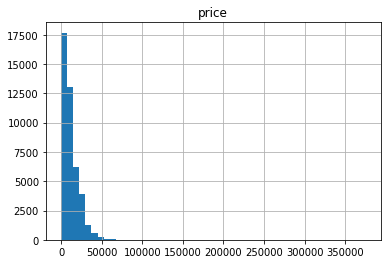

In [334]:
dataset.hist('price',bins=50)
#TOP_price_models.hist('price',bins=50)
#LOW_price_models.hist('price',bins=50)

In [287]:
dataset['vehicle_age'].describe()

count    43009.000000
mean         8.545397
std          6.277680
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64

array([[<AxesSubplot:title={'center':'vehicle_age'}>]], dtype=object)

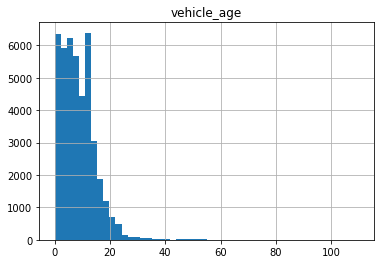

In [288]:
dataset.hist('vehicle_age',bins=50)
#TOP_price_models.hist('vehicle_age',bins=50)
#LOW_price_models.hist('vehicle_age',bins=50)



In [289]:
dataset['odometer'].describe()

count     43009.000000
mean     114967.597038
std       59882.186015
min           0.000000
25%       78840.000000
50%      113000.000000
75%      146345.000000
max      990000.000000
Name: odometer, dtype: float64

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

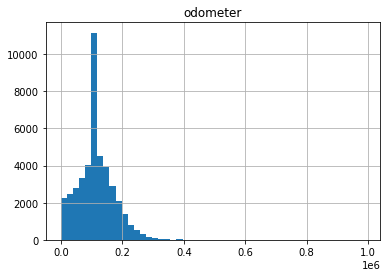

In [290]:
dataset.hist('odometer',bins=50)
#TOP_price_models.hist('odometer',bins=50)
#LOW_price_models.hist('odometer',bins=50)

<AxesSubplot:title={'center':'Overall engine size distribution'}>

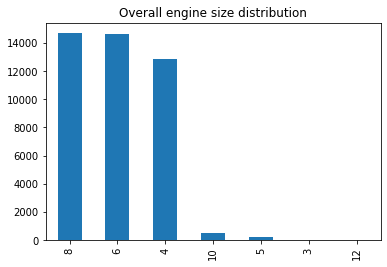

In [338]:
dataset['cylinders'].value_counts().plot(kind='bar',title='Overall engine size distribution')

<AxesSubplot:title={'center':'Overall condition distribution'}>

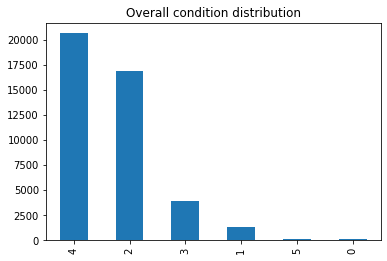

In [339]:
dataset['condition'].value_counts().plot(kind='bar',title='Overall condition distribution')

**CONCLUSIONES SOBRE LOS HISTOGRAMAS**

- Para el caso de precio es visible que existe una gran cantidad de autos con un precio demasiado bajo incluso por debajo de los 100 dólares, que deben ser investigados y tratados. De igual manera, aunque en menos cantidad, se observan precios demasiado elevados que incluso llegan a un MAX de $375K
- En el caso de edad del vehículo o vehicle_age podemos observar también una acumulación de datos en cero en la primer canasta que no siguen a la distribución de la mayoría de los datos en los que la mayoría se sitúan entre los 4 y 10 años. También se observa un pico alrededor de los doce años y datos de edad del vehículo demasiado altos, incluso por encima de los 30 años.
- Para el caso de odometer o millage podemos observar una acumulación de valores cercanos a cero o en cero, y una acumulación de datos alrededor de los 120K millas que quizá se deba a la conversión de datos ausentes a medianas generales, igualmente tenemos datos por encima de las 400K millas que son sospechosos.

<div class="alert alert-block alert-success">
Comentarios generales 1
    
<b>Comentario del revisor</b> <a class="tocSkip"></a> Aqui correcto!

## Estudiar y tratar valores atípicos


In [293]:
Q1_price = dataset['price'].quantile(0.25)
Q1_vehicle_age = dataset['vehicle_age'].quantile(0.25)
Q1_odometer = dataset['odometer'].quantile(0.25)

Q3_price = dataset['price'].quantile(0.75)
Q3_vehicle_age = dataset['vehicle_age'].quantile(0.75)
Q3_odometer = dataset['odometer'].quantile(0.75)

IQR_price = Q3_price - Q1_price
IQR_vehicle_age = Q3_vehicle_age - Q1_vehicle_age
IQR_odometer = Q3_odometer - Q1_odometer

In [294]:
# Determina los límites inferiores para valores atípicos
Lower_limit_price = Q1_price-1.5*IQR_price
Lower_limit_vehicle_age = Q1_vehicle_age-1.5*IQR_vehicle_age
Lower_limit_odometer = Q1_odometer-1.5*IQR_odometer

print('Lower_limit_price:',Lower_limit_price)
print('Lower_limit_vehicle_age:',Lower_limit_vehicle_age)
print('Lower_limit_odometer:', Lower_limit_odometer)

Lower_limit_price: -12850.0
Lower_limit_vehicle_age: -8.0
Lower_limit_odometer: -22417.5


In [295]:
# Determinar los límites superiores para valores atípicos
Upper_limit_price = Q1_price+1.5*IQR_price
Upper_limit_vehicle_age = Q1_vehicle_age+1.5*IQR_vehicle_age
Upper_limit_odometer = Q1_odometer+1.5*IQR_odometer

print('Upper_limit_price:', Upper_limit_price)
print('Upper_limit_vehicle_age:', Upper_limit_vehicle_age)
print('Upper_limit_odometer:', Upper_limit_odometer)

Upper_limit_price: 22850.0
Upper_limit_vehicle_age: 16.0
Upper_limit_odometer: 180097.5


In [308]:
# Almacena los datos sin valores atípicos en un DataFrame separado
df = pd.DataFrame() 
df['price_1'] = dataset['price']
#df = df.query('price_1 <= 22850 and price_1 > -12850.0')
df['vehicle_age_1'] = dataset['vehicle_age']
#df = df.query('vehicle_age_1 <= 16.0 and vehicle_age_1 > -8.0')
df['odometer_1'] = dataset['odometer']
df = df.query('odometer_1 <= 180097.5 and odometer_1 > -22417.5 and price_1 <= 22850 and price_1 > -12850.0 and vehicle_age_1 <= 16.0 and vehicle_age_1 > -8.0 ')
df=df.reset_index()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          29305 non-null  int64  
 1   price_1        29305 non-null  int64  
 2   vehicle_age_1  29305 non-null  int64  
 3   odometer_1     29305 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 915.9 KB
None


**COMENTARIOS SOBRE LOS VALORES ATÍPICOS**

- Se ha creado un nuevo dataframe que contiene las distribuciones de datos de las columnas price, vehicle_age y odometer sin valores atípicos altos, sin embargo aún se mantienen los valores atípicos cercanos a cero. La razón de esto es que el límite inferior más allá de 1.5IQR es negativo incluso más allá del cero en los tres casos.
- Para cylinder y condition no existen valores atípicos por lo que no se han considerado en esta sección.

## Estudiar parámetros principales sin valores atípicos

array([[<AxesSubplot:title={'center':'price_1'}>]], dtype=object)

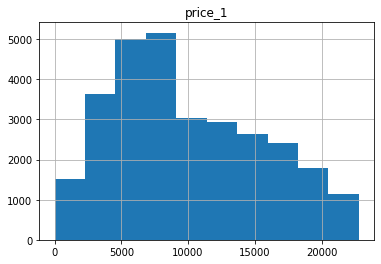

In [297]:
df.hist('price_1',bins=10)

array([[<AxesSubplot:title={'center':'vehicle_age_1'}>]], dtype=object)

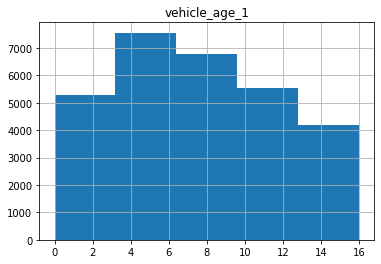

In [298]:
df.hist('vehicle_age_1',bins=5)

array([[<AxesSubplot:title={'center':'odometer_1'}>]], dtype=object)

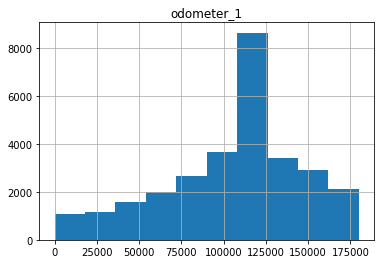

In [299]:
df.hist('odometer_1',bins=10)

**CONCLUSIONES SIN VALORES ATÍPICOS**

- En la columna de precios se puede observar una nueva distribución de precios centrada entre los 5000 y 10000 dólares con valores máximos por debajo de los $22850
- En la columna de edad de vehículo se observa ahora una distribución casi cuadrada, con la mayor parte de los vehículos con edad de 5 años aproximadamente, y un máximo de 16.
- En la columna de odómetro o millage se puede observar una distribución centrada en las 120000 millas con un máximo de 175,000 y un pico entre los 100,000 y los 125,000 debido a la conversión de datos ausentes a medianas en la sección 

<div class="alert alert-block alert-success">
Comentarios generales 1
    
<b>Comentario del revisor</b> <a class="tocSkip"></a> Los conclusiones son correctos!

## Periodo de colocación de los anuncios

In [300]:
dataset['days_listed'].describe()

count    43009.000000
mean        39.573671
std         28.180113
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

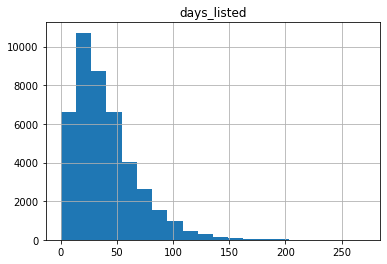

In [301]:
dataset.hist('days_listed',bins=20)

In [302]:
Q1_dlisted = dataset['days_listed'].quantile(0.25)
Q3_dlisted = dataset['days_listed'].quantile(0.75)

IQR_dlisted = Q3_dlisted - Q1_dlisted

Lower_limit_dlisted = Q1_dlisted-1.5*IQR_dlisted
Upper_limit_dlisted = Q1_dlisted+1.5*IQR_dlisted

print(Lower_limit_dlisted)
print(Upper_limit_dlisted)

-32.0
70.0


- Por regla, el 68% de los datos se ubican dentro de +/- 1 desviación estándar. En el caso de la columna days_listed considero un periodo de 39 +/- 28 días como un periodo de tiempo habitual para mantener un anuncio.
- De acuerdo con el indicador superior (+1.5IQR) de datos atípicos, un número de días para days_listed superior a 70 días es demasiado grande respecto a la concentración de la mayoría de los datos.
- En el límite inferior es un poco distinto, en realidad yo considero que un anuncio menor a 15 días es demasiado corto. Sin embargo el límite inferior -1.5IQR va más allá del mínimo de días en days_listed igual a cero.

<div class="alert alert-block alert-success">
Comentarios generales 1
    
<b>Comentario del revisor</b> <a class="tocSkip"></a> Genial!

## Precio promedio por cada tipo de vehículo

In [68]:
dataset['model'].value_counts()

ford f-150                           2315
chevrolet silverado 1500             1802
ram 1500                             1463
chevrolet silverado                  1043
jeep wrangler                         944
                                     ... 
jeep grand cherokee laredo            198
kia sorento                           198
ford f-250 super duty                 195
nissan murano                         185
mercedes-benz benze sprinter 2500      31
Name: model, Length: 100, dtype: int64

In [303]:
Total_count_by_model = dataset.pivot_table(index='model',values=['days_listed'], aggfunc='count')
Average_price_by_model = dataset.pivot_table(index='model',values=['price'], aggfunc='median')
Days_to_price_table = Total_count_by_model.join(Average_price_by_model)
Days_to_price_table.columns = ['Count','Price']
Days_to_price_table = Days_to_price_table.sort_values(by='Count',ascending=False)
print(Days_to_price_table.head(10))

                            Count    Price
model                                     
ford f-150                   2315  12497.0
chevrolet silverado 1500     1802  13995.0
ram 1500                     1463  14495.0
chevrolet silverado          1043  11950.0
jeep wrangler                 944  13984.0
ram 2500                      897  20990.0
toyota camry                  850   5894.0
honda accord                  805   5495.0
chevrolet silverado 2500hd    778  16995.0
gmc sierra 1500               776  14974.0


<AxesSubplot:xlabel='Count', ylabel='Price'>

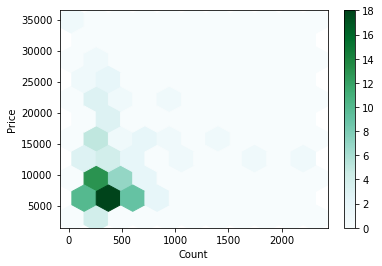

In [341]:
Days_to_price_table.plot(kind='hexbin',x='Count',y='Price',gridsize=10,sharex=False)

- El gráfico de arriba nos indica que la concentración del número de anuncios es de entre 300 y 500 para los vehículos con un precio de 5,000 a 10,000. Los vehículos en este rango de precios son los más publicitados.
- Los dos vehículos con más anuncios colocados son Ford F-150 y Chevrolet Silverado 1500 cuyos precios promedio rondan los 15,000. Su posición en la gráfica superior está fuera de la mancha que muestra los conteos y precios más comunes. O sea, son vehhículos con un rango de precio y conteo poco comunes.

## Factores de precio

In [322]:
df['condition_1'] = dataset['condition']
df['transmission_1'] = dataset['transmission']
df['color_1'] = dataset['paint_color']
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           29305 non-null  int64  
 1   price_1         29305 non-null  int64  
 2   vehicle_age_1   29305 non-null  int64  
 3   odometer_1      29305 non-null  float64
 4   condition_1     29305 non-null  int64  
 5   transmission_1  29305 non-null  object 
 6   color_1         29305 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 1.6+ MB
None


-0.39707458993701067


<AxesSubplot:title={'center':'Price to vehicle age correlation'}, xlabel='price_1', ylabel='vehicle_age_1'>

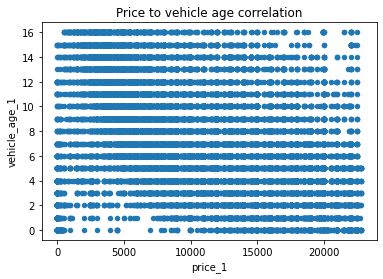

In [343]:
print(df['price_1'].corr(df['vehicle_age_1']))
df.plot(kind='scatter',x='price_1',y='vehicle_age_1',title='Price to vehicle age correlation')

-0.24338797910687004


<AxesSubplot:title={'center':'Price to odometer correlation'}, xlabel='price_1', ylabel='odometer_1'>

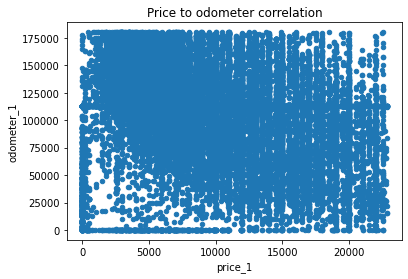

In [344]:
print(df['price_1'].corr(df['odometer_1']))
df.plot(kind='scatter',x='price_1',y='odometer_1',title='Price to odometer correlation')

0.0125097192289677


<AxesSubplot:title={'center':'Price to condition correlation'}, xlabel='price_1', ylabel='condition_1'>

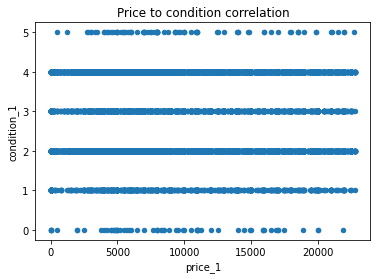

In [345]:
print(df['price_1'].corr(df['condition_1']))
df.plot(kind='scatter',x='price_1',y='condition_1',title='Price to condition correlation')

<AxesSubplot:title={'center':'price_1'}, xlabel='transmission_1'>

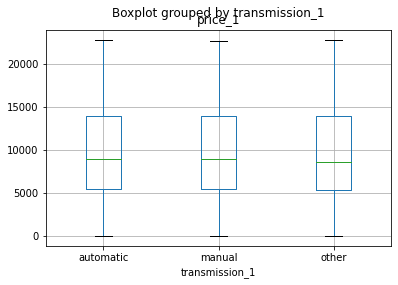

In [347]:
df.boxplot(column='price_1',by='transmission_1')

<AxesSubplot:title={'center':'price_1'}, xlabel='color_1'>

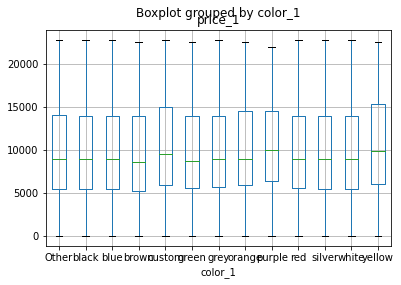

In [330]:
df.boxplot(column='price_1',by='color_1')

array([[<AxesSubplot:xlabel='index', ylabel='index'>,
        <AxesSubplot:xlabel='price_1', ylabel='index'>,
        <AxesSubplot:xlabel='vehicle_age_1', ylabel='index'>,
        <AxesSubplot:xlabel='odometer_1', ylabel='index'>,
        <AxesSubplot:xlabel='condition_1', ylabel='index'>],
       [<AxesSubplot:xlabel='index', ylabel='price_1'>,
        <AxesSubplot:xlabel='price_1', ylabel='price_1'>,
        <AxesSubplot:xlabel='vehicle_age_1', ylabel='price_1'>,
        <AxesSubplot:xlabel='odometer_1', ylabel='price_1'>,
        <AxesSubplot:xlabel='condition_1', ylabel='price_1'>],
       [<AxesSubplot:xlabel='index', ylabel='vehicle_age_1'>,
        <AxesSubplot:xlabel='price_1', ylabel='vehicle_age_1'>,
        <AxesSubplot:xlabel='vehicle_age_1', ylabel='vehicle_age_1'>,
        <AxesSubplot:xlabel='odometer_1', ylabel='vehicle_age_1'>,
        <AxesSubplot:xlabel='condition_1', ylabel='vehicle_age_1'>],
       [<AxesSubplot:xlabel='index', ylabel='odometer_1'>,
        <AxesSu

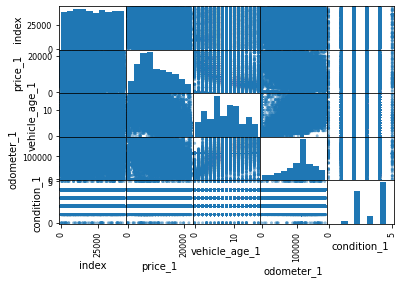

In [331]:
pd.plotting.scatter_matrix(df)

**COMENTARIOS SOBRE LOS FACTORES DETERMINANTES DEL PRECIO**

- En general, la variable precio no tiene una correlación lineal con ninguno de los parámetros analizados. Los datos demuestran que cierto modelo de vehículo puede tener cualquier rango de precio independientemente de su año modelo, tamaño de motor, transmisión, condición, color o cantidad de anuncios.
- Al parecer el precio de los vehículos depende de otra variable que no se encuentra disponible en esta tabla. Pudiera ser alguna condición de oferta y demanda por temporada y región, de lo cual no tenemos acceso en esta lista.

## Conclusión general

- Se encontraron 5 columnas con datos ausentes: model_year, cylinders, odometer, paint_color, is_4wd.
- No se encontró algún patrón evidente que relacione los datos ausentes entre las columnas evaluadas.
- Se eliminaron el 7.5% de los datos ausentes en model_year, y el 11% en cylinders, y se utilizó el valor de la mediana de odómetro general para los datos ausentes en odometer.
    - Se intentó llevar a cabo un bucle o función para asignar la mediana de odómetro por modelo y así mejorar la distribución general del odómetro pero no logré realizarlo despúes de varias horas. Mi idea era promediar el odómetro por cada modelo y sustituirlo en cada valor NaN de la columna odómetro según correspondiera. 
- Se encontraron una gran cantidad de autos con un precio demasiado bajo incluso por debajo de los 100 dólares aunque éstos se mantuvieron.
- Se eliminaron todos los datos por encima de Q1+1.5IQR para las columnas odometer, vehicle_age y price y se colocaron en un dataframe nuevo para su observación.
- Se encontró  que no existe una correlación entre el número de anuncios y el precio del vehículo. Así mismo tampoco existe una relación lineal entre odómetro, edad del vehículo, condición, transmisión o color.

<div class="alert alert-block alert-success">
Comentarios generales 1
    
<b>Comentario del revisor</b> <a class="tocSkip"></a> Muchas gracias por tu proyecto! Todo esta aceptado :)